In [3]:
import os
os.chdir('../data')

In [4]:
import numpy as np 
import pandas as pd
import math

In [5]:
raw0 = pd.read_csv('College.csv')

In [6]:
raw0.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
# Convert "private" variable to a dummy using a built-in function
raw0['Private']=pd.get_dummies(raw0['Private'],drop_first=True)

In [8]:
raw0.Private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: uint8

In [9]:
# Change the column name perc.alumni
raw0.rename(columns = {'perc.alumni':'palumni'}, inplace = True)

In [10]:
raw0.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,palumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### <font color='green'> Plotting Library: matplotlib.pyplot

* matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
    
    1. Introduction: https://matplotlib.org/tutorials/index.html

    2. Useful examples and codes: https://matplotlib.org/gallery/index.html
    
    3. Style reference: https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

In [51]:
raw0.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,palumni,Expend,GradRate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


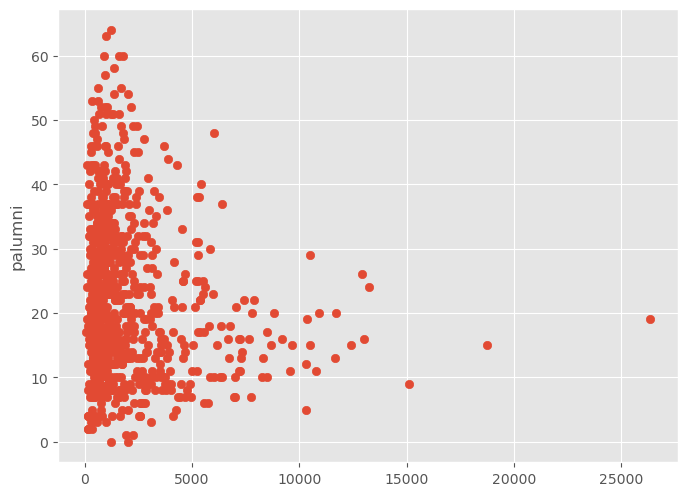

In [74]:
# Simple scatter plot
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter('Accept', 'palumni', data=raw0)
plt.xlabel('')
plt.ylabel('palumni')
plt.show()

### <font color='green'> Running OLS usig "statsmodels"

* statsmodels.formula.api: a interface for specifying models using formula strings and DataFrames. 
  (API reference: https://www.statsmodels.org/stable/api.html) 

* Useful examples and codes: https://www.statsmodels.org/stable/examples/index.html

In [12]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Fit a regression model
OLSres = smf.ols('palumni ~ Top10perc + Outstate', data=raw0).fit()

In [13]:
# A summary of the result
print(OLSres.summary())

                            OLS Regression Results                            
Dep. Variable:                palumni   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     206.7
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.21e-72
Time:                        04:23:21   Log-Likelihood:                -2891.5
No. Observations:                 777   AIC:                             5789.
Df Residuals:                     774   BIC:                             5803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2776      1.001      4.273      0.0

In [14]:
# interaction and higer order terms
OLSres = smf.ols('palumni ~ np.power(Top10perc,2) + Top10perc*Outstate', data=raw0).fit()
print(OLSres.summary())

                            OLS Regression Results                            
Dep. Variable:                palumni   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.38e-71
Time:                        04:23:22   Log-Likelihood:                -2889.1
No. Observations:                 777   AIC:                             5788.
Df Residuals:                     772   BIC:                             5812.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

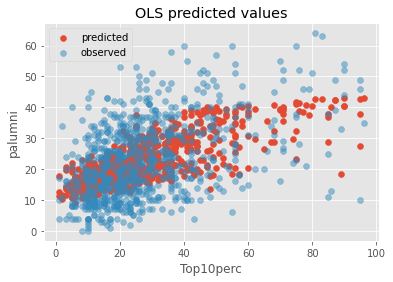

In [15]:
# Scatterplot fitted(predicted) values (palumni ~ Top10perc)

plt.scatter(raw0['Top10perc'], OLSres.predict(), alpha=1, label='predicted') # fitted
plt.scatter(raw0['Top10perc'], raw0['palumni'], alpha=0.5, label='observed') # original

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Top10perc')
plt.ylabel('palumni')
plt.show()

In [16]:
# Access individual estimate: 
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults

OLSres.params # parameter estimates

Intercept                 4.653489
np.power(Top10perc, 2)   -0.002259
Top10perc                 0.223956
Outstate                  0.001127
Top10perc:Outstate        0.000008
dtype: float64

### <font color='green'> Making a table for multiple regressions using "statsmodels.iolib.summary2"

In [17]:
OLS1 = smf.ols('palumni ~ Top10perc', data=raw0).fit()
OLS2 = smf.ols('palumni ~ Top10perc + Private + Outstate', data=raw0).fit()
OLS3 = smf.ols('palumni ~ Top10perc + Private + Outstate + Personal + Expend', data=raw0).fit()

In [18]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'BIC' : lambda x: f"{x.bic:.2f}",
    'No. observations' : lambda x: f"{int(x.nobs):d}"}

# dictionary is another way to store data, which use "keys" to index elements (instead of numbers): key-value pair

results_table = summary_col(results=[OLS1,OLS2,OLS3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'Top10perc',
                                             'Private',
                                             'Outstate',
                                             'Personal',
                                             'Expend'])

results_table.add_title('OLS Regressions')

print(results_table)

             OLS Regressions
                 Model 1  Model 2 Model 3 
------------------------------------------
Intercept        13.93*** 3.74*** 7.94*** 
                 (0.73)   (0.99)  (1.43)  
Top10perc        0.32***  0.17*** 0.18*** 
                 (0.02)   (0.02)  (0.03)  
Private                   5.50*** 4.86*** 
                          (0.97)  (0.98)  
Outstate                  0.00*** 0.00*** 
                          (0.00)  (0.00)  
Personal                          -0.00***
                                  (0.00)  
Expend                            -0.00   
                                  (0.00)  
R-squared        0.21     0.37    0.39    
R-squared Adj.   0.21     0.37    0.38    
BIC              5948.14  5778.06 5774.95 
No. observations 777      777     777     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### <font color='darkred'> HW2: Pick five combinations of the regressors to explain the percent of alumni. The regressors may include interactions of two variables in the dataset or squared/cubed variables. 
    
1. Run five regressions with each combination
2. Produce a table summarizing the results of your five regressions as above
    
### One of you will present your regression results in the coming python session. Please check/interpret your regression results carefully

In [35]:
# Combination 1
raw0.rename(columns = {'P.Undergrad':'PUndergrad'}, inplace = True)
raw0.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,palumni,Expend,GradRate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [75]:
model1 = smf.ols('palumni ~ GradRate + np.power(Expend, 0.5)', data=raw0).fit()
model2 = smf.ols('palumni ~ Accept + Apps', data=raw0).fit()
model3 = smf.ols('palumni ~ GradRate + Top10perc', data=raw0).fit()
model4 = smf.ols('palumni ~ GradRate + PhD', data=raw0).fit()
model5 = smf.ols('palumni ~ GradRate + Top25perc', data=raw0).fit()

In [76]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'BIC' : lambda x: f"{x.bic:.2f}",
    'No. observations' : lambda x: f"{int(x.nobs):d}"}
results_table = summary_col(results=[model1,model2,model3, model4, model5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                        'Model 4',
                                        'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'GradRate',
                                             'Enroll',
                                             'Expend',
                                             'Top10Perc'
                                             ])
results_table

,Model 1,Model 2,Model 3,Model 4,Model 5
Intercept,-10.72***,24.39***,0.69,-4.90**,-3.38**
,(1.84),(0.56),(1.47),(2.02),(1.54)
GradRate,0.26***,,0.25***,0.33***,0.27***
,(0.02),,(0.02),(0.02),(0.02)
Accept,,-0.00***,,,
,,(0.00),,,
Apps,,0.00***,,,
,,(0.00),,,
PhD,,,,0.08***,
,,,,(0.02),
